<a href="https://colab.research.google.com/github/LautaroAguila/ProyectoCancelacionHoteles/blob/main/CUADERNO_DE_PRUEBAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Como podemos anticipar la cancelacion de una reserva en hoteles?



#Introduccion

En este análisis, utilizaremos técnicas de análisis exploratorio de datos (EDA), preprocesamiento, reducción de dimensionalidad y modelado para predecir si una reserva de hotel se cancelará o no. Esta capacidad es crucial para los hoteles, ya que permite una mejor gestión de recursos y previsión de ingresos.


**Contexto empresarial.**

Las grandes cadenas hoteleras reciben reservas diariamente, pero también enfrentan cancelaciones. Este proyecto tiene como objetivo identificar patrones en las reservas que se cancelan, independientemente del motivo, mediante visualizaciones y análisis.

**Algunas preguntas que nos hacemos.**

1. ¿Se cancelan más las reservas semanales o de fines de semana?
1. ¿Cancelan más las familias con niños o los adultos sin hijos?
1. ¿El tiempo de espera es un factor importante para predecir cancelaciones?
1. ¿Cuál es el mes con más cancelaciones?
1. ¿Cancelan más los clientes que contratan servicios adicionales (almuerzo, desayuno o cena) o los que no?

# Carga de datos


In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [296]:
from google.colab import drive
import os
drive.mount("/content/gdirve")

Drive already mounted at /content/gdirve; to attempt to forcibly remount, call drive.mount("/content/gdirve", force_remount=True).


In [297]:
path = "/content/gdirve/MyDrive/DATA Coder/"

In [298]:
df_1 = pd.read_csv(path +'booking.csv', encoding =('ISO-8859-1'),low_memory =False)


In [299]:
df_2 = pd.read_csv(path +'hotel_bookings.csv', encoding =('ISO-8859-1'),low_memory =False)


# Exploracion de los datos.

### Columnas principales


**Nos enfocaremos en las siguientes columnas de df_1:**

*   number of adults
*   number of children
*   number of weekend nights
*   number of week nights
*   lead time
*   date of reservation
*   is_canceled

Renombramos y transformamos columnas para facilitar el análisis:

In [300]:
import numpy as np

In [301]:
# Renombrar y transformar columnas
df_1 = df_1.rename(columns={'booking status': 'is_canceled'})
df_1['is_canceled'] = df_1['is_canceled'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [302]:
# Eliminar columnas no relevantes
df_1 = df_1.drop(columns=["P-C", "P-not-C", "Booking_ID"])

In [303]:
# Convertir 'date of reservation' a formato datetime
df_1['date of reservation'] = pd.to_datetime(df_1['date of reservation'], errors='coerce')

In [304]:
df_1['type of meal'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [305]:
df_1['room type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [306]:
df_1['market segment type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [307]:
# Crear un diccionario de mapeo
mapeo_type_of_meal = {'Not Selected':0,'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
mapeo_type_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
mapeo_type_market = {'Offline':0,'Online': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4}
# Convertir los valores categóricos a numéricos
df_1['type of meal'] = df_1['type of meal'].map(mapeo_type_of_meal)
df_1['room type'] = df_1['room type'].map(mapeo_type_room)
df_1['market segment type'] = df_1['market segment type'].map(mapeo_type_market)

In [308]:
df_1 = df_1.rename(columns={'lead time': 'lead_time'})

In [309]:
# Verificar valores nulos
df_1.isnull().sum()

number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead_time                    0
market segment type          0
repeated                     0
average price                0
special requests             0
date of reservation         37
is_canceled                  0
dtype: int64

In [310]:
# Eliminar filas con valores nulos en 'date of reservation'
df_1 = df_1.dropna(subset=['date of reservation'])

In [311]:
display(df_1.isnull().sum())

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead_time                   0
market segment type         0
repeated                    0
average price               0
special requests            0
date of reservation         0
is_canceled                 0
dtype: int64

No hay ningun valor nulo para trabajar.

In [312]:
df_1.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead_time,market segment type,repeated,average price,special requests,date of reservation,is_canceled
0,1,1,2,5,1,0,1,224,0,0,88.00,0,2015-10-02,0
1,1,0,1,3,0,0,1,5,1,0,106.68,1,2018-11-06,0
2,2,1,1,3,1,0,1,1,1,0,50.00,0,2018-02-28,1
3,1,0,0,2,1,0,1,211,1,0,100.00,1,2017-05-20,1
4,1,0,1,2,0,0,1,48,1,0,77.00,0,2018-04-11,1


# Análisis Exploratorio de Datos (EDA)

## Cantidad de cancelaciones

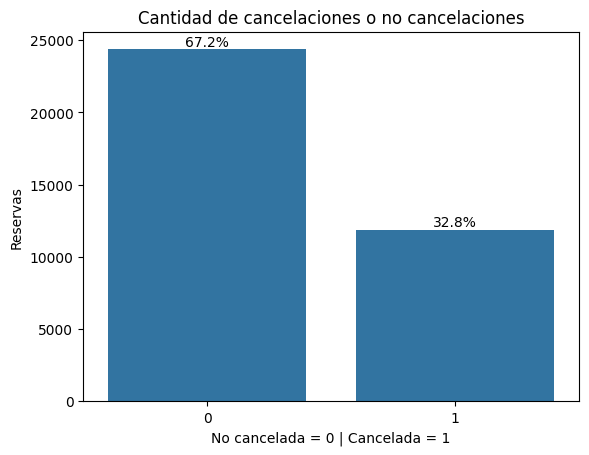

In [313]:
# Gráfico de barra para cancelaciones
ax = sns.countplot(data=df_1, x="is_canceled")
ax.set_title("Cantidad de cancelaciones o no cancelaciones")
ax.set_ylabel("Reservas")
ax.set_xlabel("No cancelada = 0 | Cancelada = 1")

# Anotar barras con porcentajes
total = df_1['is_canceled'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
plt.show()


## Cancelaciones por mes

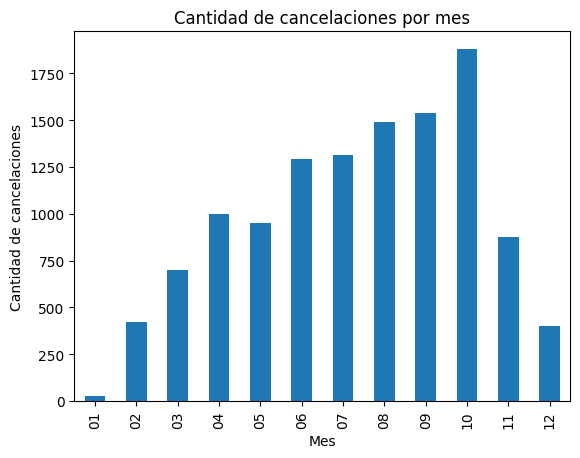

In [314]:
df_1['mes'] = df_1['date of reservation'].dt.strftime('%m')
conteo_canceled_0_por_mes = df_1[df_1['is_canceled'] == 1].groupby('mes').size()

# Gráfico de barras para cancelaciones por mes
conteo_canceled_0_por_mes.plot(kind='bar')
plt.title('Cantidad de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de cancelaciones')
plt.show()


## Cancelaciones según tiempo de espera

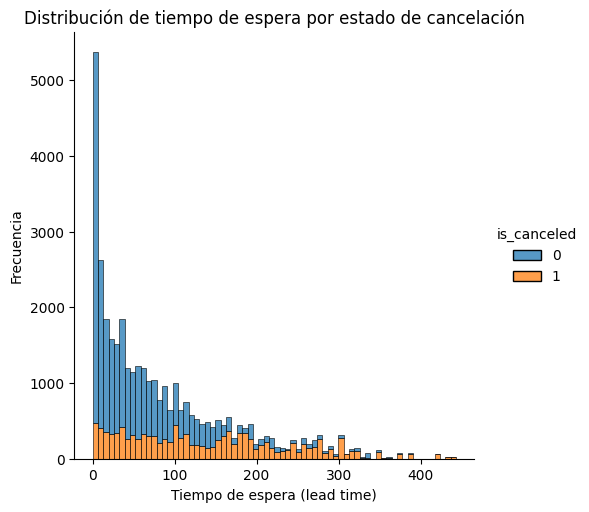

In [315]:
sns.displot(df_1, x="lead_time", kind="hist", hue='is_canceled', multiple="stack")
plt.title("Distribución de tiempo de espera por estado de cancelación")
plt.xlabel("Tiempo de espera (lead time)")
plt.ylabel("Frecuencia")
plt.show()


## Cancelaciones según número de niños y adultos

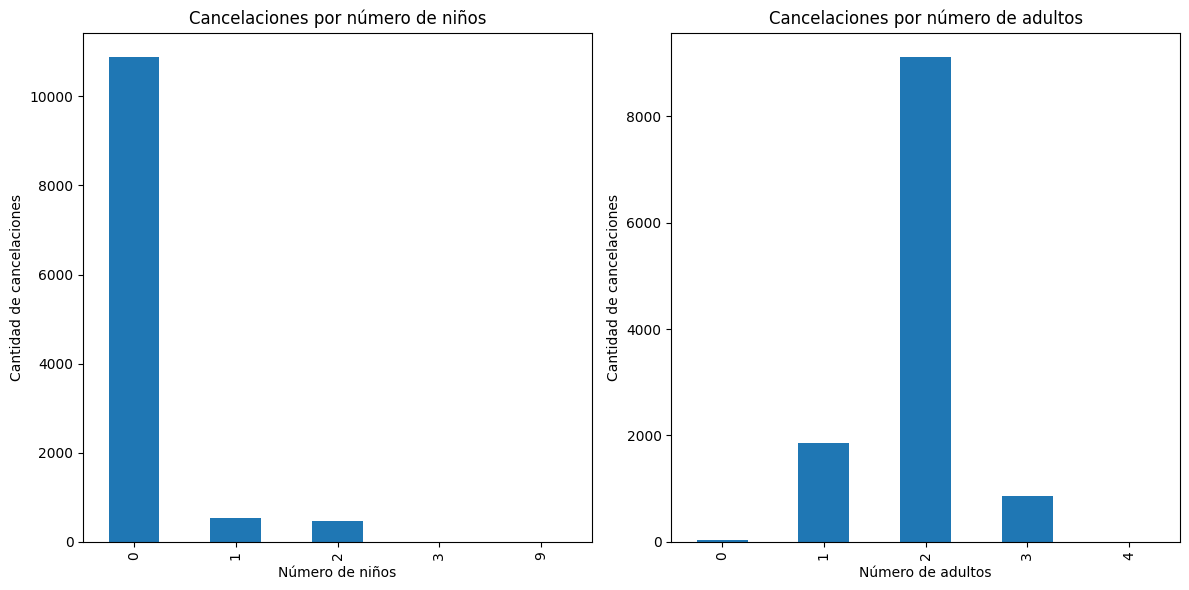

In [316]:
# Cancelaciones por número de niños
cancelaciones_por_ninos = df_1[df_1['is_canceled'] == 1].groupby('number of children').size()

# Cancelaciones por número de adultos
cancelaciones_por_adultos = df_1[df_1['is_canceled'] == 1].groupby('number of adults').size()

# Crear gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de cancelaciones por número de niños
cancelaciones_por_ninos.plot(kind='bar', ax=axs[0])
axs[0].set_title('Cancelaciones por número de niños')
axs[0].set_xlabel('Número de niños')
axs[0].set_ylabel('Cantidad de cancelaciones')

# Gráfico de cancelaciones por número de adultos
cancelaciones_por_adultos.plot(kind='bar', ax=axs[1])
axs[1].set_title('Cancelaciones por número de adultos')
axs[1].set_xlabel('Número de adultos')
axs[1].set_ylabel('Cantidad de cancelaciones')

plt.tight_layout()
plt.show()


## Conclusión del EDA
A través de estos gráficos, podemos identificar patrones importantes como:

*   Un alto porcentaje de cancelaciones (más del 32%).
*   Octubre es el mes con más cancelaciones.
*   El tiempo de espera es un factor significativo en las cancelaciones.
*   Los adultos que reservan con niños cancelan menos que aquellos que van sin niños.

Estos patrones nos ayudan a comprender mejor el comportamiento de las cancelaciones y pueden servir de base para desarrollar modelos predictivos.

# Elección de la Clasificación y PCA

**Justificación de la Clasificación**

La variable objetivo (is_canceled) es binaria y categórica, ya que solo puede tomar dos valores: 0 (no cancelada) o 1 (cancelada). Debido a la naturaleza de esta variable, utilizamos técnicas de clasificación para predecir su valor.

**Algoritmos de Clasificación Utilizados**

1. Regresión Logística:

  * *Ventajas*: Fácil de implementar e interpretar, eficiente con grandes conjuntos de datos y proporciona probabilidades de predicción.
  * *Uso en nuestro contexto*: Nos permite entender la relación entre las características y la probabilidad de cancelación.
2. Máquinas de Soporte Vectorial (SVM):

  * Ventajas: Eficiente en espacios de alta dimensionalidad, versátil con diferentes núcleos (kernel) y capacidad para encontrar hiperplanos óptimos.
  * Uso en nuestro contexto: Útil para separar las reservas canceladas de las no canceladas cuando las relaciones no son lineales.
3. K-Nearest Neighbors (KNN):

  * Ventajas: Simplicidad en la implementación y uso, no hace suposiciones sobre la distribución de los datos.
  * Uso en nuestro contexto: Nos permite clasificar las reservas basándose en la similitud con reservas anteriores.
4. Árboles de Decisión:

  * Ventajas: Fácil de visualizar e interpretar, puede manejar datos categóricos y numéricos.
  * Uso en nuestro contexto: Nos ayuda a entender las reglas de decisión que llevan a una cancelación.

In [317]:
# Preprocesamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y objetivo
X = df_1.drop(columns=["is_canceled", "date of reservation"])
y = df_1['is_canceled']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [318]:
# Reducción de Dimensionalidad
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Aumentar el número de componentes
pca = PCA(n_components=13)  # Especifica la cantidad correcta de componentes principales
X_train_pca = pca.fit_transform(X_train)

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada explicada:", pca.explained_variance_ratio_.cumsum())


Varianza explicada por cada componente: [0.1621476  0.14136433 0.09666256 0.0853762  0.08191409 0.07563313
 0.06616322 0.06231741 0.05805209 0.05351039 0.04533839 0.03722247
 0.03429813]
Varianza acumulada explicada: [0.1621476  0.30351193 0.40017448 0.48555069 0.56746478 0.64309791
 0.70926113 0.77157854 0.82963063 0.88314101 0.9284794  0.96570187
 1.        ]


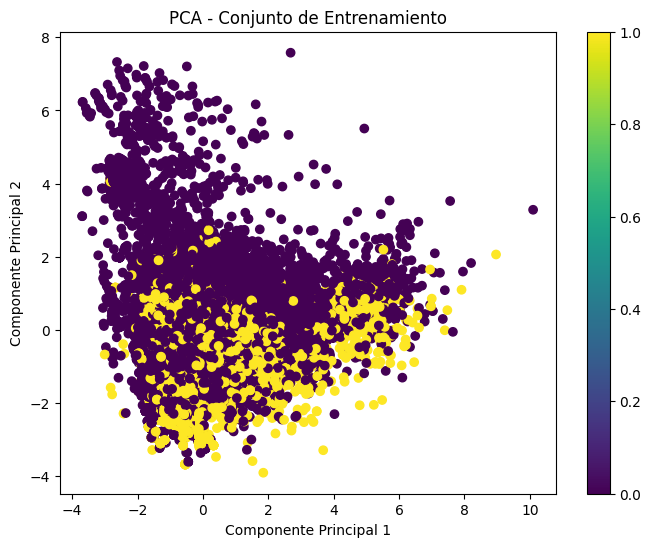

In [319]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA a los datos estandarizados
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Conjunto de Entrenamiento')
plt.colorbar()
plt.show()


# Comparamos los distintos algoritmos de clasificacion.

### Regresión Logística

In [320]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenar el modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test_pca)

# Evaluar el modelo
print("Regresión Logística")
print(f"Exactitud: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_lr)}\n")



Regresión Logística
Exactitud: 0.79
Precisión: 0.73
Recall: 0.57
F1-score: 0.64
Matriz de Confusión:
[[4376  505]
 [1019 1350]]



### Máquinas de Soporte Vectorial (SVM)

In [322]:
from sklearn.svm import SVC

# Entrenar el modelo
svm = SVC(random_state=42)
svm.fit(X_train_pca, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test_pca)

# Evaluar el modelo
print("Máquinas de Soporte Vectorial")
print(f"Exactitud: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_svm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_svm)}\n")



Máquinas de Soporte Vectorial
Exactitud: 0.84
Precisión: 0.82
Recall: 0.67
F1-score: 0.74
Matriz de Confusión:
[[4532  349]
 [ 788 1581]]



### Gradient Boosting Machines (GBM)

In [323]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar el clasificador GBM
gbm = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
gbm.fit(X_train_pca, y_train)
y_pred_gbm = gbm.predict(X_test_pca)

# Evaluar el modelo
print("Gradient Boosting Machines")
print(f"Exactitud: {accuracy_score(y_test, y_pred_gbm):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_gbm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_gbm):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_gbm):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_gbm)}\n")

Gradient Boosting Machines
Exactitud: 0.83
Precisión: 0.80
Recall: 0.65
F1-score: 0.72
Matriz de Confusión:
[[4496  385]
 [ 819 1550]]



### K-Nearest Neighbors (KNN)

In [324]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_pca)

# Evaluar el modelo
print("K-Nearest Neighbors")
print(f"Exactitud: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_knn)}\n")


K-Nearest Neighbors
Exactitud: 0.85
Precisión: 0.79
Recall: 0.75
F1-score: 0.77
Matriz de Confusión:
[[4404  477]
 [ 599 1770]]



### Árboles de Decisión

In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Entrenar el modelo
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train_pca, y_train)

# Predicciones
y_pred_dt = dt.predict(X_test_pca)

# Evaluar el modelo
print("Árboles de Decisión")
print(f"Exactitud: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_dt)}\n")



Árboles de Decisión
Exactitud: 0.75
Precisión: 0.74
Recall: 0.36
F1-score: 0.48
Matriz de Confusión:
[[4584  297]
 [1516  853]]



### Random Forest

In [326]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf.fit(X_train_pca, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_rf = rf.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Exactitud del modelo Random Forest:", accuracy_rf)
print(f"Exactitud: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_rf)}\n")


Exactitud del modelo Random Forest: 0.8816551724137931
Exactitud: 0.88
Precisión: 0.85
Recall: 0.78
F1-score: 0.81
Matriz de Confusión:
[[4553  328]
 [ 530 1839]]



### Matrices de confusion.

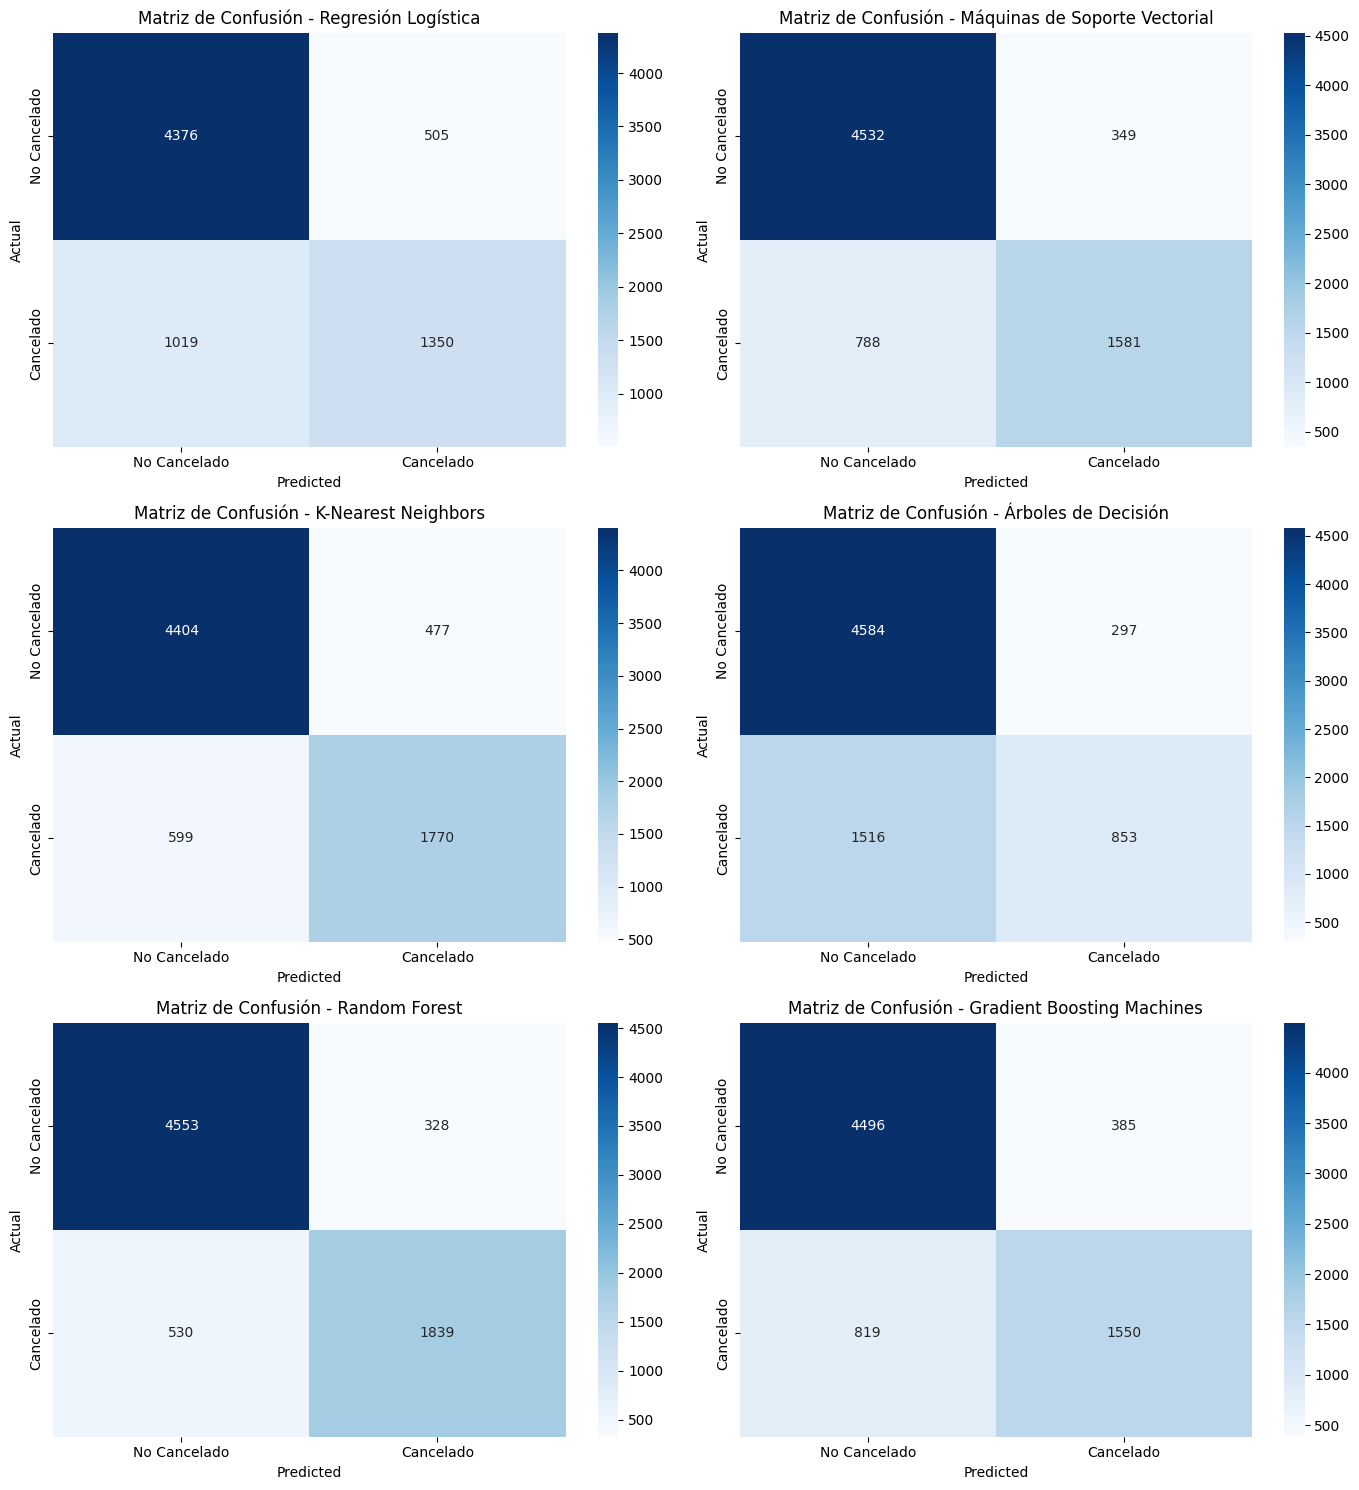

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir la función para graficar la matriz de confusión
def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancelado', 'Cancelado'], yticklabels=['No Cancelado', 'Cancelado'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Matriz de Confusión - {model_name}')

# Crear una figura con varios subplots (3x2)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Regresión Logística
y_pred_lr = lr.predict(X_test_pca)
plot_confusion_matrix(axes[0, 0], y_test, y_pred_lr, 'Regresión Logística')

# Máquinas de Soporte Vectorial (SVM)
y_pred_svm = svm.predict(X_test_pca)
plot_confusion_matrix(axes[0, 1], y_test, y_pred_svm, 'Máquinas de Soporte Vectorial')

# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test_pca)
plot_confusion_matrix(axes[1, 0], y_test, y_pred_knn, 'K-Nearest Neighbors')

# Árboles de Decisión
y_pred_dt = dt.predict(X_test_pca)
plot_confusion_matrix(axes[1, 1], y_test, y_pred_dt, 'Árboles de Decisión')

# Random Forest
y_pred_rf = rf.predict(X_test_pca)
plot_confusion_matrix(axes[2, 0], y_test, y_pred_rf, 'Random Forest')

# Gradient Boosting Machines (GBM)
y_pred_gbm = gbm.predict(X_test_pca)
plot_confusion_matrix(axes[2, 1], y_test, y_pred_gbm, 'Gradient Boosting Machines')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


Con estas matrices podemos ver que,

      | No Cancelado   | Verdader Negativo | Falso Positivo   |
    -----------------------------------------------------------
      | Cancelado      | Falso Negativo    | Verdadero Psitivo|

Vemos que todos los algoritmos tienen valores parecidos en las casillas de VN y VP, pero las casillas que marcan la diferencia son las de FN y FP.

Es muy perjudicial para nuestra prediccion si nuestro modelo es muy propenso a decirnos que una reserva sera cancelada cuando en realidad no, o al contrario que nos diga que una reserva no sera cancelada cuando en ralidad si.


### Conclusion

En base a todas las metricas que vimos: Exactitud, Precisión, Recall, F1-score y Matriz de Confusión podemos decir que el modelo que mejor predice nuestra variable 'is_canceled', es "Random Forest" ya que tiene una exactitud de 79% y una precisión de 72%, ademas su Recall, que indica cuántas de las reservas realmente canceladas fueron identificadas correctamente, es de un 60% siendo este el mas alto de los 6 modelos probados.

# Random Forest


In [328]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf.fit(X_train_pca, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_rf = rf.predict(X_test_pca)

# Obtener el reporte de clasificación
print("Reporte de Clasificación del modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte de Clasificación del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4881
           1       0.85      0.78      0.81      2369

    accuracy                           0.88      7250
   macro avg       0.87      0.85      0.86      7250
weighted avg       0.88      0.88      0.88      7250



Cantidad de características: 13
Cantidad de importancias: 13


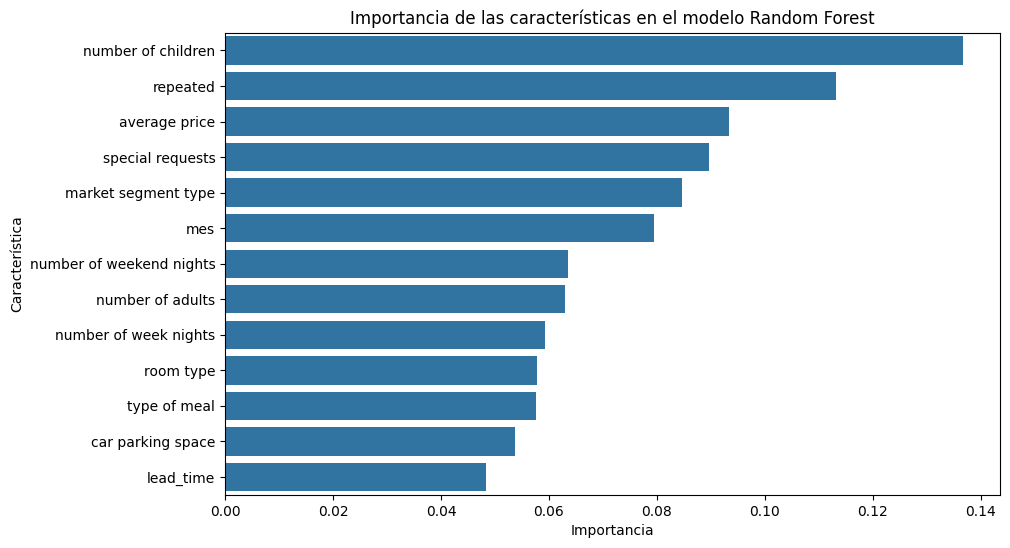

In [329]:
# Obtener la importancia de las características
importances = rf.feature_importances_

# Obtener el nombre de las características
feature_names = df_1.drop(columns=["is_canceled", "date of reservation"]).columns

# Verificar la longitud de los arrays
print("Cantidad de características:", len(feature_names))
print("Cantidad de importancias:", len(importances))

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las características en el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


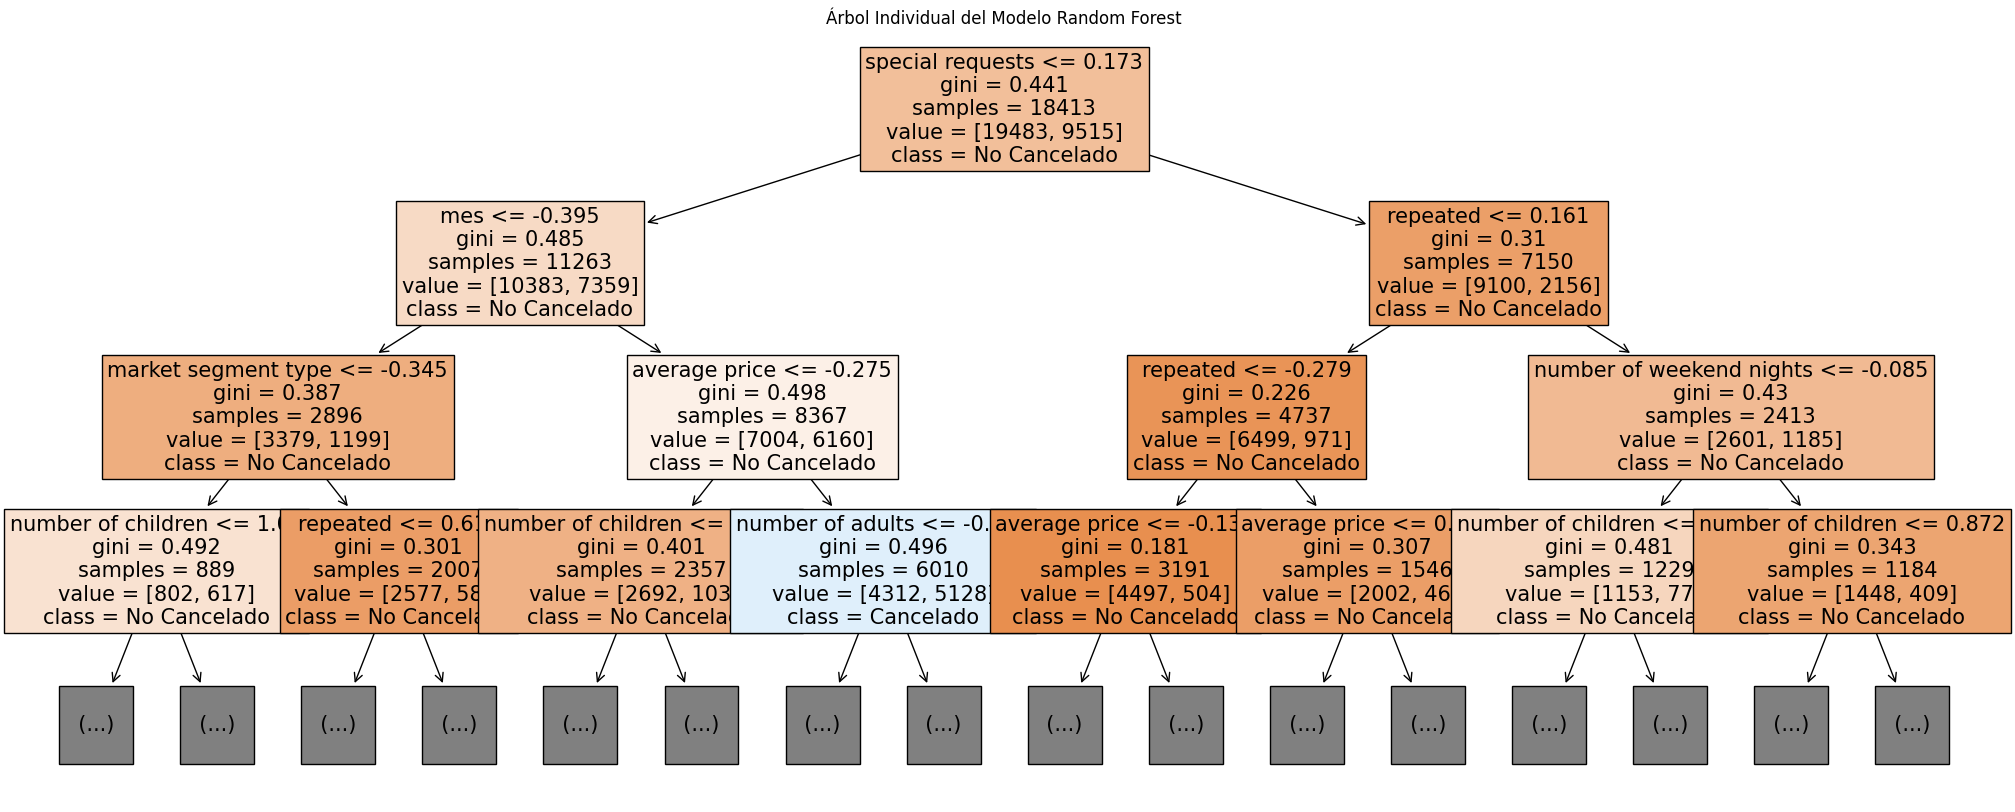

In [338]:
# Importar la librería para visualizar el árbol
from sklearn.tree import plot_tree

# Visualizar un árbol individual del modelo Random Forest
plt.figure(figsize=(25, 10))
plot_tree(rf.estimators_[0],fontsize=15, feature_names=feature_names, class_names=["No Cancelado", "Cancelado"],max_depth=3, filled=True)
plt.title('Árbol Individual del Modelo Random Forest')
plt.show()
